In [4]:
%pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import pipeline


In [2]:
# If you haven't installed these yet, uncomment:
# !pip install -U transformers torch accelerate sentencepiece fastapi uvicorn[standard] Pillow

import os
import torch
from transformers import pipeline

# Optional: set a custom cache dir (e.g., to keep your home clean)
# os.environ["HF_HOME"] = "/tmp/hf_home"

DEVICE = 0 if torch.cuda.is_available() else -1  # GPU if available, else CPU
print("Using device:", "CUDA" if DEVICE == 0 else "CPU")


Using device: CPU


In [8]:
!pip install -U tf-keras


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.6 MB/s  0:00:00


# TEXT Pipeline

In [6]:
# quick test Pinpeline
#Sentiment analysis
clf = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    framework="pt",   # be explicit
    device=DEVICE
)

texts = [
    "I love how simple Hugging Face makes NLP!",
    "This is the worst UI I've ever seen."
]
print(clf(texts))


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9997585415840149}, {'label': 'NEGATIVE', 'score': 0.9997983574867249}]


In [9]:
# B. Zero-shot classification (label anything without fine-tuning)

zsc = pipeline("zero-shot-classification",
               model="facebook/bart-large-mnli",
               device=DEVICE)

print(zsc(
    "We adopted a golden retriever puppy.",
    candidate_labels=["sports", "pets", "finance", "politics"]
))


Device set to use cpu


{'sequence': 'We adopted a golden retriever puppy.', 'labels': ['pets', 'sports', 'finance', 'politics'], 'scores': [0.9777827858924866, 0.017328906804323196, 0.0028445266652852297, 0.0020437934435904026]}


In [11]:
! pip install hf_xet

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 5.6 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.9 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 5.6 MB/s  0:00:00


In [10]:
# C. Question Answering (extractive)
qa = pipeline("question-answering",
              model="deepset/roberta-base-squad2",
              device=DEVICE)

context = """The Apollo program was the third United States human spaceflight program 
carried out by NASA, which succeeded in landing the first humans on the Moon from 1969 to 1972."""
print(qa({"question": "Who ran the Apollo program?", "context": context}))


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.9817129373550415, 'start': 89, 'end': 93, 'answer': 'NASA'}


C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\transformers\pipelines\question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


In [12]:
# D. Text generation (causal LM)

# Small model for CPU-friendly demos; use 'gpt2' if you prefer
gen = pipeline("text-generation",
               model="distilgpt2",
               device=DEVICE)

print(gen("In the future, artificial intelligence will", max_new_tokens=40, do_sample=True))


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In the future, artificial intelligence will be able to act as a catalyst for greater economic growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'}]


In [3]:
# Fill-mask (masked LM)
mlm = pipeline("fill-mask",
               model="bert-base-uncased",
               device=DEVICE)

print(mlm("Hugging Face is creating a [MASK] that the community loves.", top_k=5))


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


[{'score': 0.04263027012348175, 'token': 4031, 'token_str': 'product', 'sequence': 'hugging face is creating a product that the community loves.'}, {'score': 0.04258760064840317, 'token': 2227, 'token_str': 'face', 'sequence': 'hugging face is creating a face that the community loves.'}, {'score': 0.03617507964372635, 'token': 2839, 'token_str': 'character', 'sequence': 'hugging face is creating a character that the community loves.'}, {'score': 0.02856161817908287, 'token': 2466, 'token_str': 'story', 'sequence': 'hugging face is creating a story that the community loves.'}, {'score': 0.02668689750134945, 'token': 3861, 'token_str': 'picture', 'sequence': 'hugging face is creating a picture that the community loves.'}]


In [ ]:
# F. Named Entity Recognition (token-classification)
ner = pipeline("token-classification",
               model="dslim/bert-base-NER",
               aggregation_strategy="simple",
               device=DEVICE)

print(ner("Tim Cook is the CEO of Apple, which is based in Cupertino."))


In [ ]:
# Summarization

summ = pipeline("summarization",
                model="facebook/bart-large-cnn",  # try "sshleifer/distilbart-cnn-12-6" for lighter
                device=DEVICE)

article = """Hugging Face provides tools that enable rapid experimentation, training,
and deployment of state-of-the-art models. The transformers library offers thousands of
pretrained models across NLP, vision, and audio tasks, supported by a vibrant community."""
print(summ(article, max_length=60, min_length=15))


In [ ]:
# Translation 
trans = pipeline("translation",
                 model="Helsinki-NLP/opus-mt-en-fr",
                 device=DEVICE)

print(trans("Hello, world! This notebook shows several Hugging Face pipelines."))


In [3]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"  # force PyTorch; avoid TF/Keras issues

from fastapi import FastAPI
from pydantic import BaseModel
from transformers import pipeline

DEVICE = -1  # CPU
app = FastAPI(title="HF Pipelines Demo (CPU)")

# Load pipelines once at startup
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=DEVICE,
)
zsc_pipe = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=DEVICE,
)

class SentimentIn(BaseModel):
    text: str

class ZSCIn(BaseModel):
    text: str
    labels: list[str]

@app.get("/healthz")
def healthz():
    return {"status": "ok"}

@app.post("/predict/sentiment")
def predict_sentiment(inp: SentimentIn):
    return sentiment_pipe(inp.text)

@app.post("/predict/zero-shot")
def predict_zsc(inp: ZSCIn):
    return zsc_pipe(inp.text, candidate_labels=inp.labels)


Device set to use cpu
Device set to use cpu


In [11]:
import threading, time, requests, uvicorn, nest_asyncio

nest_asyncio.apply()

PORT = 8010
BASE = f"http://127.0.0.1:{PORT}"

def run_server():
    # no reload in notebooks; it spawns extra processes
    uvicorn.run(app, host="127.0.0.1", port=PORT, reload=False, log_level="info")

# If a previous thread died but the port is busy, just change PORT to another (e.g., 8011)
thread = threading.Thread(target=run_server, daemon=True)
thread.start()
print(f"Starting server on {BASE} ...")

# Wait until /healthz responds (max ~30s)
for i in range(60):
    try:
        r = requests.get(f"{BASE}/healthz", timeout=1)
        if r.ok:
            print("Server is ready:", r.json())
            break
    except Exception:
        time.sleep(0.5)
else:
    raise RuntimeError("Server did not become ready. Try a different PORT.")


Starting server on http://127.0.0.1:8010 ...


INFO:     Started server process [40928]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8010 (Press CTRL+C to quit)


INFO:     127.0.0.1:58670 - "GET /healthz HTTP/1.1" 200 OK
Server is ready: {'status': 'ok'}
INFO:     127.0.0.1:58675 - "GET /healthz HTTP/1.1" 200 OK
INFO:     127.0.0.1:58676 - "POST /predict/sentiment HTTP/1.1" 200 OK
INFO:     127.0.0.1:58677 - "POST /predict/zero-shot HTTP/1.1" 200 OK


In [12]:
import requests, json

BASE = "http://127.0.0.1:8010"

print("Health:", requests.get(f"{BASE}/healthz").json())

r1 = requests.post(f"{BASE}/predict/sentiment",
                   json={"text": "I love this library!"})
print("Sentiment:", r1.json())

r2 = requests.post(f"{BASE}/predict/zero-shot",
                   json={"text": "We adopted a golden retriever puppy.",
                         "labels": ["sports","pets","finance","politics"]})
print("Zero-shot:", json.dumps(r2.json(), indent=2))


Health: {'status': 'ok'}
Sentiment: [{'label': 'POSITIVE', 'score': 0.9998852014541626}]
Zero-shot: {
  "sequence": "We adopted a golden retriever puppy.",
  "labels": [
    "pets",
    "sports",
    "finance",
    "politics"
  ],
  "scores": [
    0.9777827858924866,
    0.017328906804323196,
    0.0028445266652852297,
    0.0020437934435904026
  ]
}


In [ ]:
# Start the API server from the notebook (stop with the interrupt button).
# After launching, POST to:
#   http://127.0.0.1:8000/predict/sentiment
#   http://127.0.0.1:8000/predict/zero-shot
# For example with curl:
#   curl -X POST localhost:8000/predict/sentiment -H "Content-Type: application/json" -d '{"text":"I love this!"}'
#
# Note: This will block the cell; run it in a separate terminal if you prefer.
# !uvicorn __main__:app --host 127.0.0.1 --port 8000 --reload


In [6]:
%pip install gradio


   ---------------------------------------- 0.0/63.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/63.5 MB 4.2 MB/s eta 0:00:16
   - -------------------------------------- 1.8/63.5 MB 4.6 MB/s eta 0:00:14
   -- ------------------------------------- 3.7/63.5 MB 6.1 MB/s eta 0:00:10
   --- ------------------------------------ 5.0/63.5 MB 6.2 MB/s eta 0:00:10
   --- ------------------------------------ 5.0/63.5 MB 6.2 MB/s eta 0:00:10
   --- ------------------------------------ 5.0/63.5 MB 6.2 MB/s eta 0:00:10
   --- ------------------------------------ 5.8/63.5 MB 3.9 MB/s eta 0:00:15
   ----- ---------------------------------- 9.4/63.5 MB 6.0 MB/s eta 0:00:10
   ------ --------------------------------- 11.0/63.5 MB 6.0 MB/s eta 0:00:09
   -------- ------------------------------- 12.8/63.5 MB 6.1 MB/s eta 0:00:09
   --------- ------------------------------ 14.7/63.5 MB 6.3 MB/s eta 0:00:08
   ---------- ----------------------------- 16.3/63.5 MB 6.4 MB/s eta 0:00:08
  

  You can safely remove it manually.


In [7]:
import gradio as gr
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def classify(text):
    return classifier(text, candidate_labels=["animals", "humans", "landscape"])

gr.Interface(fn=classify, inputs="text", outputs="json").launch()


C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\pydantic\_internal\_generate_schema.py:800: RuntimeWarning: coroutine 'Server.serve' was never awaited
  ),
C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\pydantic\_internal\_generate_schema.py:800: RuntimeWarning: coroutine 'BaseEventLoop.shutdown_asyncgens' was never awaited
  ),
Device set to use cpu


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [6]:
%pip install fastapi uvicorn transformers torch



   ---------------------------------------- 0/3 [uvicorn]
   ------------- -------------------------- 1/3 [starlette]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   ---------------------------------------- 3/3 [fastapi]

Note: you may need to restart the kernel to use updated packages.


# TensorFlow deployment in ADS

import ads
import logging
import os
import pandas as pd
import tempfile
import tensorflow as tf
import tensorflow_dataset as tfds
import warnings

form ads.catalog.model import ModelCatalog
from ads.model.model_metadata import UseCaseType

from ads.dataset.factory import DatasetFactory
from ads.model.framework.tensorflow_model import TensorFlowModel
from shutil import rmtree
ads.set_auth(auth="reource_principal')

logging.basicConfig(formmat='%[levelname)s:%(message)s', level=logging.ERROR)
             warning.filterwarnings('ignore')


             

In [12]:
%pip install tensorflow


   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 1.0/331.8 MB 6.3 MB/s eta 0:00:53
   ---------------------------------------- 2.9/331.8 MB 7.3 MB/s eta 0:00:46
    --------------------------------------- 4.2/331.8 MB 7.6 MB/s eta 0:00:43
    --------------------------------------- 4.2/331.8 MB 7.6 MB/s eta 0:00:43
    --------------------------------------- 6.6/331.8 MB 6.4 MB/s eta 0:00:51
   - -------------------------------------- 8.4/331.8 MB 6.9 MB/s eta 0:00:47
   - -------------------------------------- 11.8/331.8 MB 8.2 MB/s eta 0:00:40
   - -------------------------------------- 13.6/331.8 MB 8.3 MB/s eta 0:00:39
   - -------------------------------------- 15.5/331.8 MB 8.4 MB/s eta 0:00:38
   -- ------------------------------------- 17.3/331.8 MB 8.4 MB/s eta 0:00:38
   -- ------------------------------------- 19.4/331.8 MB 8.6 MB/s eta 0:00:37
   -- ------------------------------------- 21.2/331.8 MB 8.5 MB/s

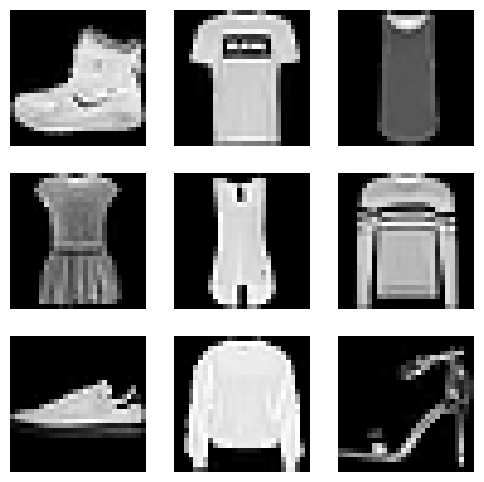

In [7]:
import tensorflow as tf
from matplotlib import pyplot as plt

# ✅ The correct module name is 'datasets', not 'dataset'
fmnist = tf.keras.datasets.fashion_mnist

# ✅ Correct function call
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

# ✅ Display the first 9 images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [8]:
class TFModel:
    fmnist = tf.keras.datasets.fashion_mnist
    (X_train, y_train), (X_test, y_test) = fmnist.load_data()
    X_train, x_test = X_train/255, X_test/255
    X_train, y_train = X_train[:10000],y_train[:10000]

    def training(self):
        model=tf.keras.models.Sequential(
            [
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(128,activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(10),
            ]
        )
        loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
        model.fit(self.X_train, self.y_train, epochs=1)

        return model
        

In [9]:
tfmodel = TFModel()
model = tfmodel.training()





313/313 [==============================] - 2s 3ms/step - loss: 0.7761 - accuracy: 0.7244


In [62]:
model.predict(TFModel().X_test[0:1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[-4.121047  , -5.028302  , -2.586026  , -3.984714  , -4.2030106 ,
         2.900264  , -1.9720377 ,  3.7941837 ,  0.38108268,  5.111182  ]],
      dtype=float32)

In [10]:
import numpy as np

# Create a new instance (optional — or reuse tfmodel)
tfmodel = TFModel()
model = tfmodel.training()

# Get the first test image (reshape to batch size = 1)
sample = tfmodel.X_test[0:1]  # ✅ correct slicing
pred = model.predict(sample)

# Convert raw logits to predicted class
predicted_class = np.argmax(pred, axis=1)
print("Predicted class:", predicted_class)
print("True label:", tfmodel.y_test[0])


1/1 [==============================] - 0s 138ms/step
Predicted class: [9]
True label: 9


In [61]:
import os
os.environ["ODSC_MODEL_LOCAL_RUN"] = "True"

import ads.common.auth as authutil
authutil.default_signer = lambda *args, **kwargs: {"signer": None}

from ads.model.framework.tensorflow_model import TensorFlowModel
import tempfile

artifact_dir = tempfile.mkdtemp()
print(f"Model artifact directory: {artifact_dir}")

tf_model = TensorFlowModel(
    estimator=model,
    artifact_dir=artifact_dir,
    auth={"signer": None}     # 👈 prevents ADS from calling OCI APIs
)


ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ytian\AppData\Local\Temp\ipykernel_26072\1550949533.py", line 13, in <module>
    tf_model = TensorFlowModel(
               ^^^^^^^^^^^^^^^^
  File "C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\ads\common\decorator\runtime_dependency.py", line 174, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\ads\model\framework\tensorflow_model.py", line 174, in __init__
    super().__init__(
  File "C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\ads\model\generic_model.py", line 392, in __init__
    DataScienceModel()
  File "C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\ads\model\datascience_model.py", line 663, in __init__

Model artifact directory: C:\Users\ytian\AppData\Local\Temp\tmpw1iuc1do


TypeError: DataScienceClient.__init__() missing 1 required positional argument: 'config'

In [53]:
# === Step 3: Package locally (OCI-free) ===
artifact_dir = tempfile.mkdtemp()
print(f"✅ Local artifact directory: {artifact_dir}")

# Save TensorFlow model (✅ correct format)
model_save_path = os.path.join(artifact_dir, "model")
model.export(model_save_path)  # instead of model.save()

# Create runtime.yaml manually
runtime_yaml = {
    "INFERENCE_ENV_PATH": "tensorflow26_p37_cpu_v2",
    "MODEL_ARTIFACT_VERSION": "2.0",
    "MODEL_DEPLOYMENT": {
        "INFERENCE_CONDA_ENV": "tensorflow26_p37_cpu_v2",
        "INFERENCE_ENV_SLUG": "tensorflow26",
        "INFERENCE_ENV_TYPE": "python"
    }
}
with open(os.path.join(artifact_dir, "runtime.yaml"), "w") as f:
    yaml.dump(runtime_yaml, f)

# Create score.py manually
score_py = """import tensorflow as tf
import numpy as np
import os

def load_model(model_dir):
    return tf.keras.models.load_model(os.path.join(model_dir, "model"))

def predict(data, model):
    arr = np.array(data)
    preds = model.predict(arr)
    return preds.tolist()
"""
with open(os.path.join(artifact_dir, "score.py"), "w") as f:
    f.write(score_py)

print("✅ Model packaged locally (OCI-free).")
print("📂 Files in artifact dir:", os.listdir(artifact_dir))


✅ Local artifact directory: C:\Users\ytian\AppData\Local\Temp\tmpt79a049g
INFO:absl:Function `__call__` contains input name(s) resource with unsupported characters which will be renamed to sequential_6_1_dense_13_1_biasadd_readvariableop_resource in the SavedModel.
INFO:absl:Function `__call__` contains input name(s) resource with unsupported characters which will be renamed to sequential_6_1_dense_13_1_biasadd_readvariableop_resource in the SavedModel.
INFO:tensorflow:Assets written to: C:\Users\ytian\AppData\Local\Temp\tmpt79a049g\model\assets
INFO:tensorflow:Assets written to: C:\Users\ytian\AppData\Local\Temp\tmpt79a049g\model\assets
Saved artifact at 'C:\Users\ytian\AppData\Local\Temp\tmpt79a049g\model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_30')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2761286468240: TensorSpec(shape=()

In [59]:
import tensorflow as tf
from tensorflow import keras

saved_model_path = r"C:\Users\ytian\AppData\Local\Temp\tmpt79a049g\model"

# Load as a TensorFlow SavedModel for inference
model_layer = keras.layers.TFSMLayer(saved_model_path, call_endpoint='serving_default')

# Run prediction
import numpy as np
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_test = X_test / 255.0

# Prepare one sample (add batch dimension)
sample = np.expand_dims(X_test[0], axis=0)
pred = model_layer(sample)

print("✅ Inference OK. Predicted logits:", pred)


✅ Inference OK. Predicted logits: {'output_0': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-4.121047  , -5.028302  , -2.586026  , -3.984714  , -4.2030106 ,
         2.900264  , -1.9720377 ,  3.7941837 ,  0.38108268,  5.111182  ]],
      dtype=float32)>}
